In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Mount Google Drive

# Path to your CSV file (adjust this path)

# Read CSV into DataFrame
df = pd.read_csv('car_price_prediction.csv')

# Display first rows
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
"""
# from the first time, I doesn't see any Missing values...
# the columns ("Levy", "engine volume", "Mileage", "Doors") which are a numerical columns, they are "Object".
# the "Leather interior" column is "Object" it should be boolean.
# the "Cylinders" column is float it should be integer.
"""

'\n# from the first time, I doesn\'t see any Missing values...\n# the columns ("Levy", "engine volume", "Mileage", "Doors") which are a numerical columns, they are "Object".\n# the "Leather interior" column is "Object" it should be boolean.\n# the "Cylinders" column is float it should be integer.\n'

In [5]:
# also there is an error in the data here the Number of "Doors" the classes should be:
# "04-May" => "04-05"
# "02-Mar" => "02-03"
# ">5" => it is correct and means more than 5 Doors for specal cars, vans, and mini-buses.
df["Doors"].value_counts()

Doors
04-May    18332
02-Mar      777
>5          128
Name: count, dtype: int64

In [6]:
# there is a duplicated data (all the row data is duplicated) because we use ".duplicated()" on all the data without chose a subset column to chick in so all the row data are duplicated.
# we need to drop them.
df.loc[df.duplicated(keep = False)].sort_values("ID")

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
7269,35464629,7840,1111,HONDA,FIT,2012,Hatchback,No,Petrol,1.3,108000 km,4.0,Automatic,Front,04-May,Right-hand drive,Blue,6
5754,35464629,7840,1111,HONDA,FIT,2012,Hatchback,No,Petrol,1.3,108000 km,4.0,Automatic,Front,04-May,Right-hand drive,Blue,6
1107,36559154,19726,-,MERCEDES-BENZ,Sprinter 411,2002,Goods wagon,No,Diesel,2.2 Turbo,280000 km,4.0,Manual,Rear,02-Mar,Left wheel,White,2
6732,36559154,19726,-,MERCEDES-BENZ,Sprinter 411,2002,Goods wagon,No,Diesel,2.2 Turbo,280000 km,4.0,Manual,Rear,02-Mar,Left wheel,White,2
9990,41770767,11917,-,NISSAN,Murano,2004,Jeep,Yes,CNG,3.5,233600 km,6.0,Variator,4x4,04-May,Left wheel,Silver,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15880,45815564,9408,-,MERCEDES-BENZ,E 240,2000,Sedan,No,Petrol,2.4,252000 km,6.0,Manual,Rear,04-May,Left wheel,Black,4
3756,45815994,4077,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,111930 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
14469,45815994,4077,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,111930 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
1171,45816384,49237,730,HYUNDAI,Tucson,2016,Jeep,Yes,Petrol,1.6,27000 km,4.0,Tiptronic,4x4,04-May,Left wheel,White,12


In [7]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [8]:
# the "Levy" column contains the "-" and it's mean 0 so the have (0) taxes need to pay.
df["Levy"].head(7)

0    1399
1    1018
2       -
3     862
4     446
5     891
6     761
Name: Levy, dtype: object

In [9]:
# No zeros in the data so I think the "-" means no tax on the car (0 taxes need to pay).
df.loc[df["Levy"] == "0"]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags


In [10]:
###########################################################################
###################### <<<<<<< Data Cleaning >>>>>>> ######################
###########################################################################

In [11]:
# dorp duplicated rows:
df.drop_duplicates(keep = "first", inplace = True)
print(f"dana now contains : {df.shape[0]} rows")

dana now contains : 18924 rows


In [12]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [13]:
df.rename(columns = {"Levy" : "Extra_tax", "Prod. year" : "Prod_year", "Gear box type" : "Gear_type"}, inplace = True)

df.columns = df.columns.str.replace(" ", "_").str.capitalize()

# only the "Id" all letter are capetal "ID":
df.rename(columns = {"Id" : "ID"}, inplace = True)

In [14]:
# replace "-" => "0"
pd.set_option("display.max_rows", None)
df["Extra_tax"] = df["Extra_tax"].replace({"-": "0"})

In [15]:
# type cast to from "Object" to "float":
df["Extra_tax"] = df["Extra_tax"].astype("float32")

In [16]:
df.columns

Index(['ID', 'Price', 'Extra_tax', 'Manufacturer', 'Model', 'Prod_year',
       'Category', 'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [17]:
# the "Engine_volume":
  # 1) the problem that there is 2 types of the Engines (Normal Engine, Turbo Engine)
df["Engine_volume"].value_counts()

Engine_volume
2            3856
2.5          2246
1.8          1743
1.6          1446
1.5          1289
3.5          1182
2.4           977
3             818
1.3           516
2.0 Turbo     403
4.6           369
1.4           363
3.0 Turbo     268
2.2           224
2.2 Turbo     216
3.3           199
1.8 Turbo     175
1.4 Turbo     154
1.7           151
3.2           146
2.7           131
1.6 Turbo     116
3.6           116
1             115
2.3           114
4             105
1.2           101
4.7            98
2.5 Turbo      91
4.4            79
3.7            76
5              66
1.5 Turbo      65
2.8            58
5.5            55
5.7            51
2.4 Turbo      50
2.7 Turbo      49
1.9            39
1.7 Turbo      38
3.5 Turbo      37
4.8            33
3.8            32
1.9 Turbo      31
6.2            24
3.2 Turbo      24
4.4 Turbo      24
0.4            22
0.7            19
4.2            18
2.6            18
1.3 Turbo      18
4.7 Turbo      18
2.3 Turbo      16
2.8 Turbo     

In [18]:
# Split the
df["Engine_is_turbo"] = df["Engine_volume"].apply(lambda volume: volume.find("Turbo") > -1)
df["Engine_volume"] = df["Engine_volume"].str.split(" ", n = 1).str[0].astype("float32")

df.head(3)

,ID,Price,Extra_tax,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_is_turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,45774419,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False


In [19]:
# I will split the data into 2 columns ["Engine_volume", "Engine_type"], to convert the "Engine_volume" float:
# df["Engine_volume"].apply(lambda volume: volume.find("Turbo") > -1).value_counts()

In [20]:
# in the "Mileage" there is the "km" so we need to split the data are remove it.
# here there is no row without the "km":
df.loc[~(df["Mileage"].str.find("km") > -1)]

,ID,Price,Extra_tax,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_is_turbo


In [21]:
df["Mileage"].str.split(" ").apply(lambda list: len(list)).value_counts()

Mileage
2    18924
Name: count, dtype: int64

In [22]:
# i split basen on the space and  take the number part then Cast the dataType to "int32"
df["Mileage"] = df["Mileage"].str.split(" ").str[0].astype("int32")

In [23]:
######################## "Engen_volume" ########################
# df["Engine_volume"].str.split(" ", n = 1).str[0].astype("float32")

In [24]:
# the "Leather interior" need to be bool:
# it only contains the "yes" and "no":
df["Leather_interior"].value_counts()

Leather_interior
Yes    13731
No      5193
Name: count, dtype: int64

In [25]:
# we replace the "Yes" and "No" values:
df["Leather_interior"] = df["Leather_interior"].map({"Yes" : True, "No": False})
df["Leather_interior"].head()

0     True
1    False
2    False
3     True
4     True
Name: Leather_interior, dtype: bool

In [26]:
#### df = df[df['Mileage'] < 1000000]

In [27]:
df["Fuel_type"].value_counts()

Fuel_type
Petrol            9944
Diesel            4001
Hybrid            3539
LPG                885
CNG                469
Plug-in Hybrid      85
Hydrogen             1
Name: count, dtype: int64

In [28]:
# drop the "Hydrogen" in Fule_type because it's only one row and we can't use the prediction because there is no other row:
df.drop(index = df.loc[df["Fuel_type"] == "Hydrogen"].index, inplace = True)

In [29]:
# the "Doors" there are weard "04-May",  "02-Mar" I think the exle system or the auto python stystem change the "05" to "May" in "04-May", and "03" to "Mar" in "02-Mar", so we replace them:
df["Doors"] = df["Doors"].replace({"04-May" : "4 - 5",
                     "02-Mar" : "2 - 3",
                     ">5" : "more than 5"})
df["Doors"].value_counts()

Doors
4 - 5          18031
2 - 3            768
more than 5      124
Name: count, dtype: int64

In [30]:
# the "Cylinders" to "int"
df["Cylinders"] = df["Cylinders"].astype("int32")

In [31]:
# in real_world there is no "Cylinders" value (7, 9) because the car won't be balance, but in our data there is these values:
df["Cylinders"].value_counts()

Cylinders
4     14159
6      3372
8       976
5       169
3       107
2        42
12       38
1        37
10       12
16        5
7         4
9         1
14        1
Name: count, dtype: int64

In [32]:
# So I insted of drop thses rows, I will convert it to Null values and try to fill them by a specal ML model:
df.loc[df["Cylinders"].isin([7, 9])]

,ID,Price,Extra_tax,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_is_turbo
2598,45765767,7213,0.0,FORD,Transit Fff,1991,Microbus,False,Diesel,2.5,111111,7,Manual,Rear,4 - 5,Left wheel,White,1,False
2953,45781926,2800,0.0,VAZ,2107,1999,Sedan,False,Petrol,1.6,10000,9,Manual,4x4,2 - 3,Left wheel,White,6,False
4186,45370037,30,0.0,TOYOTA,Prius,2011,Hatchback,False,Hybrid,1.5,77000,7,Tiptronic,Front,4 - 5,Left wheel,White,12,False
8161,45790496,18503,308.0,TOYOTA,Prius,2014,Hatchback,False,Hybrid,1.8,112000,7,Automatic,Rear,4 - 5,Left wheel,Green,11,False
18673,45741881,40,0.0,HONDA,FIT,2007,Hatchback,True,Petrol,1.6,15000000,7,Automatic,Front,4 - 5,Left wheel,Sky blue,9,False


In [33]:
# only one row:
df.loc[(df["Manufacturer"] == "FORD") & (df["Model"] == "Transit Fff") & (df["Prod_year"] == 1991)]

,ID,Price,Extra_tax,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_is_turbo
2598,45765767,7213,0.0,FORD,Transit Fff,1991,Microbus,False,Diesel,2.5,111111,7,Manual,Rear,4 - 5,Left wheel,White,1,False


In [34]:
df.loc[(df["Manufacturer"] == "VAZ") & (df["Model"] == "2107") & (df["Prod_year"] == 1999)]

,ID,Price,Extra_tax,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_is_turbo
2953,45781926,2800,0.0,VAZ,2107,1999,Sedan,False,Petrol,1.6,10000,9,Manual,4x4,2 - 3,Left wheel,White,6,False


In [35]:
df.loc[(df["Manufacturer"] == "TOYOTA") & (df["Model"] == "Prius") & (df["Prod_year"] ==2014 ) & (df["Category"] == "Hatchback")]

,ID,Price,Extra_tax,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_is_turbo
411,45806771,1882,308.0,TOYOTA,Prius,2014,Hatchback,True,Hybrid,1.8,263392,4,Automatic,Front,4 - 5,Left wheel,Red,12,False
607,45654826,188,308.0,TOYOTA,Prius,2014,Hatchback,True,Hybrid,1.8,140414,4,Automatic,Front,4 - 5,Left wheel,White,12,False
1380,45780356,20385,0.0,TOYOTA,Prius,2014,Hatchback,True,Hybrid,1.8,49000,4,Automatic,Front,4 - 5,Left wheel,Silver,12,False
1714,45655992,4391,308.0,TOYOTA,Prius,2014,Hatchback,True,Hybrid,1.8,151923,4,Automatic,Front,4 - 5,Left wheel,White,12,False
1770,45687222,20700,0.0,TOYOTA,Prius,2014,Hatchback,True,Hybrid,1.8,75621,4,Automatic,Front,4 - 5,Left wheel,Blue,11,False
2175,45813404,784,271.0,TOYOTA,Prius,2014,Hatchback,True,Hybrid,1.5,0,4,Automatic,Front,4 - 5,Left wheel,White,12,False
3214,45760602,20385,308.0,TOYOTA,Prius,2014,Hatchback,False,Hybrid,1.8,155000,4,Tiptronic,Front,4 - 5,Left wheel,Grey,8,False
3833,45655555,941,308.0,TOYOTA,Prius,2014,Hatchback,True,Hybrid,1.8,270410,4,Automatic,Front,4 - 5,Left wheel,White,12,False
3878,45761437,18817,308.0,TOYOTA,Prius,2014,Hatchback,False,Hybrid,1.8,145000,4,Automatic,Front,4 - 5,Left wheel,Grey,10,False
4057,45771964,21012,0.0,TOYOTA,Prius,2014,Hatchback,False,Hybrid,1.8,99040,4,Variator,Front,4 - 5,Left wheel,White,8,False


In [36]:
df.loc[(df["Manufacturer"] == "TOYOTA") & (df["Model"] == "Prius") & (df["Prod_year"] ==2011 ) & (df["Category"] == "Hatchback")]

,ID,Price,Extra_tax,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_is_turbo
74,45816646,14740,645.0,TOYOTA,Prius,2011,Hatchback,False,Hybrid,1.8,288000,4,Automatic,Front,4 - 5,Left wheel,White,8,False
408,45787208,12544,645.0,TOYOTA,Prius,2011,Hatchback,False,Hybrid,1.8,284678,4,Automatic,Front,4 - 5,Left wheel,Silver,12,False
449,45775702,17249,0.0,TOYOTA,Prius,2011,Hatchback,False,Hybrid,1.8,141000,4,Automatic,Front,4 - 5,Left wheel,Grey,6,False
617,45674384,14740,645.0,TOYOTA,Prius,2011,Hatchback,False,Hybrid,1.8,161000,4,Variator,Front,4 - 5,Left wheel,Blue,11,False
852,45789384,7056,645.0,TOYOTA,Prius,2011,Hatchback,False,Hybrid,1.8,255000,4,Variator,Front,2 - 3,Left wheel,White,12,False
1599,45393927,15053,645.0,TOYOTA,Prius,2011,Hatchback,False,Hybrid,1.8,14900,4,Automatic,Front,4 - 5,Left wheel,Silver,10,False
1640,45430528,12858,645.0,TOYOTA,Prius,2011,Hatchback,False,Hybrid,1.8,116000,4,Variator,Front,4 - 5,Left wheel,Grey,12,False
1722,45656871,188,645.0,TOYOTA,Prius,2011,Hatchback,True,Hybrid,1.8,197328,4,Automatic,Front,4 - 5,Left wheel,White,12,False
1880,45798553,17249,645.0,TOYOTA,Prius,2011,Hatchback,True,Hybrid,1.8,188800,4,Variator,Front,4 - 5,Left wheel,Grey,10,False
3322,45813014,251,645.0,TOYOTA,Prius,2011,Hatchback,True,Hybrid,1.8,230939,4,Automatic,Front,4 - 5,Left wheel,Blue,12,False


In [37]:
# the "FORD" and "VAZ" are only one row so we will drop them:
df.drop(index = df.loc[(df["Manufacturer"] == "FORD") & (df["Model"] == "Transit Fff") & (df["Prod_year"] == 1991)].index, inplace = True)
df.drop(index = df.loc[(df["Manufacturer"] == "VAZ") & (df["Model"] == "2107") & (df["Prod_year"] == 1999)].index, inplace = True)

In [38]:
# other data will add to missing dataFrame:
Miss_data = df.loc[df["Cylinders"].isin([7, 9])]

Miss_data["Cylinders"] = Miss_data["Cylinders"].astype("float32")
Miss_data.loc[df["Cylinders"].isin([7, 9]), "Cylinders"] = np.nan

Miss_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 4186 to 18673
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3 non-null      int64  
 1   Price             3 non-null      int64  
 2   Extra_tax         3 non-null      float32
 3   Manufacturer      3 non-null      object 
 4   Model             3 non-null      object 
 5   Prod_year         3 non-null      int64  
 6   Category          3 non-null      object 
 7   Leather_interior  3 non-null      bool   
 8   Fuel_type         3 non-null      object 
 9   Engine_volume     3 non-null      float32
 10  Mileage           3 non-null      int32  
 11  Cylinders         0 non-null      float32
 12  Gear_type         3 non-null      object 
 13  Drive_wheels      3 non-null      object 
 14  Doors             3 non-null      object 
 15  Wheel             3 non-null      object 
 16  Color             3 non-null      object 
 17 

/tmp/ipykernel_11165/1532761577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Miss_data["Cylinders"] = Miss_data["Cylinders"].astype("float32")


In [39]:
# the cars erliear than 2000 => "Engen_volume" are unreal values (because Engine_volume < 1 is not real):
df.loc[(df["Prod_year"] > 2000) & (df["Engine_volume"] < 1)]

,ID,Price,Extra_tax,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_is_turbo
171,45782173,1300,0.0,AUDI,50,2018,Coupe,True,Petrol,0.5,4000,1,Tiptronic,Rear,more than 5,Right-hand drive,Blue,0,False
235,45758164,282,289.0,FORD,Escape,2008,Jeep,True,Hybrid,0.4,220474,4,Automatic,Front,4 - 5,Left wheel,Grey,0,False
331,45757416,282,289.0,FORD,Escape,2008,Jeep,True,Hybrid,0.4,220474,4,Automatic,Front,4 - 5,Left wheel,Grey,0,False
380,44719048,5645,706.0,MITSUBISHI,I,2011,Hatchback,False,Petrol,0.7,92000,3,Automatic,Front,4 - 5,Right-hand drive,Brown,2,False
394,45759758,4391,0.0,MITSUBISHI,Pajero Mini,2006,Jeep,False,Petrol,0.7,314000,3,Manual,4x4,2 - 3,Right-hand drive,Silver,2,False
547,45769158,282,289.0,FORD,Escape,2008,Jeep,True,Hybrid,0.4,220474,4,Automatic,Front,4 - 5,Left wheel,Grey,0,False
664,45789776,3293,565.0,CHEVROLET,Matiz,2007,Sedan,True,Petrol,0.8,134863,4,Automatic,Front,4 - 5,Left wheel,Golden,4,False
707,45811644,8154,0.0,MITSUBISHI,Airtrek,2002,Jeep,False,LPG,0.2,18800,4,Tiptronic,4x4,4 - 5,Left wheel,Black,2,True
799,45790012,6899,638.0,SUBARU,Stella,2012,Hatchback,False,Petrol,0.7,14000,3,Automatic,Front,4 - 5,Right-hand drive,Silver,0,False
1585,45761150,1333,289.0,FORD,Escape,2008,Jeep,True,Hybrid,0.4,349288,4,Automatic,Front,4 - 5,Left wheel,Blue,0,False


In [40]:
# insted of drop them we will convert the "Engine_volume" for them to "NaN" values and predict them by a specal ML model later:
df.loc[(df["Prod_year"] > 2000) & (df["Engine_volume"] < 1), "Engine_volume"] = np.nan

# add the unreal "Engine_volume" in a seperate dataFrame:
Miss_data2 = df.loc[df["Engine_volume"].isnull()]

# drop the NaN in "Engine_volumn" from the df:
df.dropna(inplace = True)

# the results:
df.isnull().sum()

ID                  0
Price               0
Extra_tax           0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage             0
Cylinders           0
Gear_type           0
Drive_wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Engine_is_turbo     0
dtype: int64

In [41]:
Miss_data2.head()

,ID,Price,Extra_tax,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_is_turbo
171,45782173,1300,0.0,AUDI,50,2018,Coupe,True,Petrol,NaN,4000,1,Tiptronic,Rear,more than 5,Right-hand drive,Blue,0,False
235,45758164,282,289.0,FORD,Escape,2008,Jeep,True,Hybrid,NaN,220474,4,Automatic,Front,4 - 5,Left wheel,Grey,0,False
331,45757416,282,289.0,FORD,Escape,2008,Jeep,True,Hybrid,NaN,220474,4,Automatic,Front,4 - 5,Left wheel,Grey,0,False
380,44719048,5645,706.0,MITSUBISHI,I,2011,Hatchback,False,Petrol,NaN,92000,3,Automatic,Front,4 - 5,Right-hand drive,Brown,2,False
394,45759758,4391,0.0,MITSUBISHI,Pajero Mini,2006,Jeep,False,Petrol,NaN,314000,3,Manual,4x4,2 - 3,Right-hand drive,Silver,2,False


In [42]:
# we will concat them to the Missing_data dataFrame:
Concated_miss_data = pd.concat([Miss_data, Miss_data2])
Concated_miss_data

,ID,Price,Extra_tax,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_is_turbo
4186,45370037,30,0.0,TOYOTA,Prius,2011,Hatchback,False,Hybrid,1.5,77000,NaN,Tiptronic,Front,4 - 5,Left wheel,White,12,False
8161,45790496,18503,308.0,TOYOTA,Prius,2014,Hatchback,False,Hybrid,1.8,112000,NaN,Automatic,Rear,4 - 5,Left wheel,Green,11,False
18673,45741881,40,0.0,HONDA,FIT,2007,Hatchback,True,Petrol,1.6,15000000,NaN,Automatic,Front,4 - 5,Left wheel,Sky blue,9,False
171,45782173,1300,0.0,AUDI,50,2018,Coupe,True,Petrol,NaN,4000,1.0,Tiptronic,Rear,more than 5,Right-hand drive,Blue,0,False
235,45758164,282,289.0,FORD,Escape,2008,Jeep,True,Hybrid,NaN,220474,4.0,Automatic,Front,4 - 5,Left wheel,Grey,0,False
331,45757416,282,289.0,FORD,Escape,2008,Jeep,True,Hybrid,NaN,220474,4.0,Automatic,Front,4 - 5,Left wheel,Grey,0,False
380,44719048,5645,706.0,MITSUBISHI,I,2011,Hatchback,False,Petrol,NaN,92000,3.0,Automatic,Front,4 - 5,Right-hand drive,Brown,2,False
394,45759758,4391,0.0,MITSUBISHI,Pajero Mini,2006,Jeep,False,Petrol,NaN,314000,3.0,Manual,4x4,2 - 3,Right-hand drive,Silver,2,False
547,45769158,282,289.0,FORD,Escape,2008,Jeep,True,Hybrid,NaN,220474,4.0,Automatic,Front,4 - 5,Left wheel,Grey,0,False
664,45789776,3293,565.0,CHEVROLET,Matiz,2007,Sedan,True,Petrol,NaN,134863,4.0,Automatic,Front,4 - 5,Left wheel,Golden,4,False


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18840 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18840 non-null  int64  
 1   Price             18840 non-null  int64  
 2   Extra_tax         18840 non-null  float32
 3   Manufacturer      18840 non-null  object 
 4   Model             18840 non-null  object 
 5   Prod_year         18840 non-null  int64  
 6   Category          18840 non-null  object 
 7   Leather_interior  18840 non-null  bool   
 8   Fuel_type         18840 non-null  object 
 9   Engine_volume     18840 non-null  float32
 10  Mileage           18840 non-null  int32  
 11  Cylinders         18840 non-null  int32  
 12  Gear_type         18840 non-null  object 
 13  Drive_wheels      18840 non-null  object 
 14  Doors             18840 non-null  object 
 15  Wheel             18840 non-null  object 
 16  Color             18840 non-null  object 
 17

In [44]:

new_col = ['ID',
 'Manufacturer',
 'Model',
 'Prod_year',
 'Category',
 'Leather_interior',
 'Fuel_type',
 'Engine_volume',
 'Engine_is_turbo',
 'Mileage',
 'Cylinders',
 'Gear_type',
 'Drive_wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags',
 'Extra_tax'
 ,'Price']

df = df[new_col]

df.head()

,ID,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Engine_is_turbo,Mileage,Cylinders,Gear_type,Drive_wheels,Doors,Wheel,Color,Airbags,Extra_tax,Price
0,45654403,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,False,186005,6,Automatic,4x4,4 - 5,Left wheel,Silver,12,1399.0,13328
1,44731507,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,False,192000,6,Tiptronic,4x4,4 - 5,Left wheel,Black,8,1018.0,16621
2,45774419,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,False,200000,4,Variator,Front,4 - 5,Right-hand drive,Black,2,0.0,8467
3,45769185,FORD,Escape,2011,Jeep,True,Hybrid,2.5,False,168966,4,Automatic,4x4,4 - 5,Left wheel,White,0,862.0,3607
4,45809263,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,False,91901,4,Automatic,Front,4 - 5,Left wheel,Silver,4,446.0,11726


Visualization

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18840 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18840 non-null  int64  
 1   Manufacturer      18840 non-null  object 
 2   Model             18840 non-null  object 
 3   Prod_year         18840 non-null  int64  
 4   Category          18840 non-null  object 
 5   Leather_interior  18840 non-null  bool   
 6   Fuel_type         18840 non-null  object 
 7   Engine_volume     18840 non-null  float32
 8   Engine_is_turbo   18840 non-null  bool   
 9   Mileage           18840 non-null  int32  
 10  Cylinders         18840 non-null  int32  
 11  Gear_type         18840 non-null  object 
 12  Drive_wheels      18840 non-null  object 
 13  Doors             18840 non-null  object 
 14  Wheel             18840 non-null  object 
 15  Color             18840 non-null  object 
 16  Airbags           18840 non-null  int64  
 17

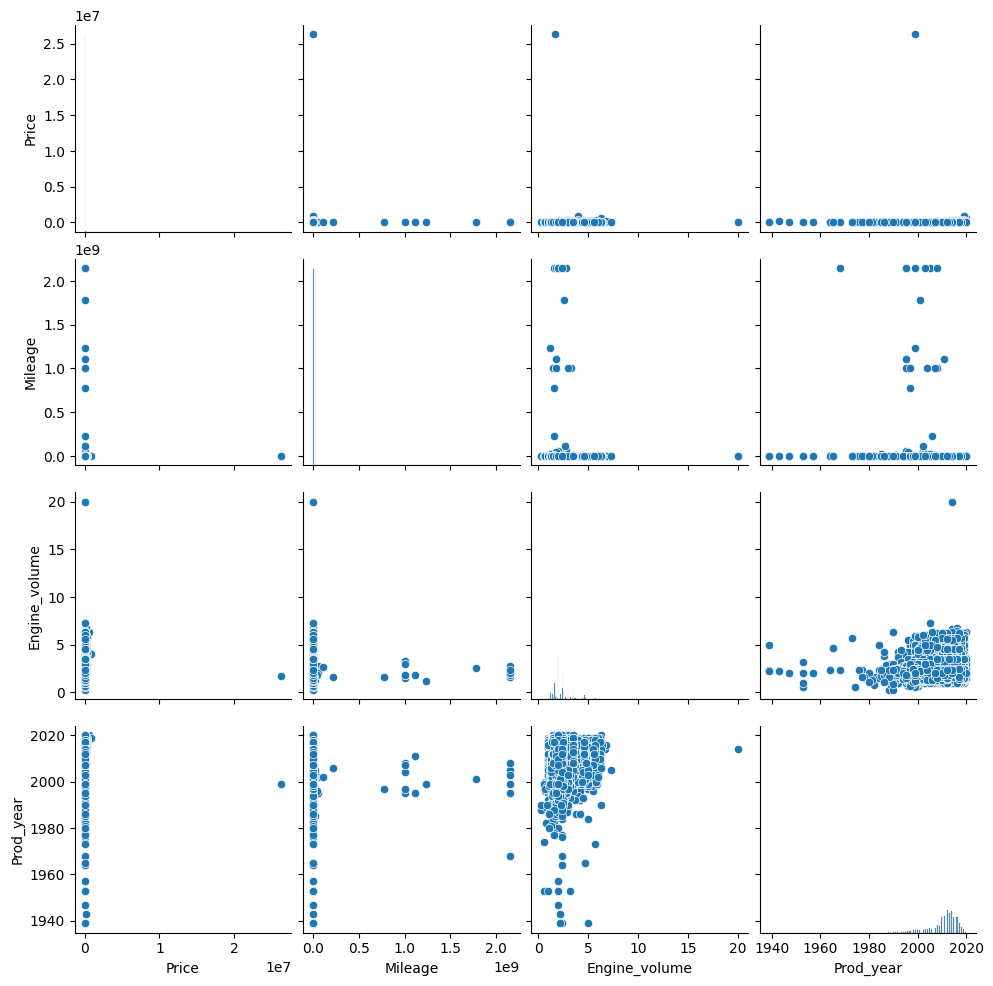

In [46]:
sns.pairplot(df[['Price', 'Mileage', 'Engine_volume', 'Prod_year']])
plt.show()

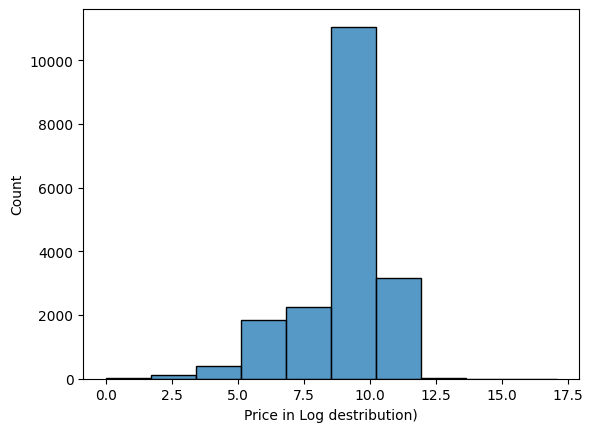

In [47]:
sns.histplot(np.log(df['Price']), bins=10)
plt.xlabel("Price in Log destribution)")
plt.show()


In [48]:
df['Price'].describe()

count    1.884000e+04
mean     1.863660e+04
std      1.925579e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.226600e+04
max      2.630750e+07
Name: Price, dtype: float64

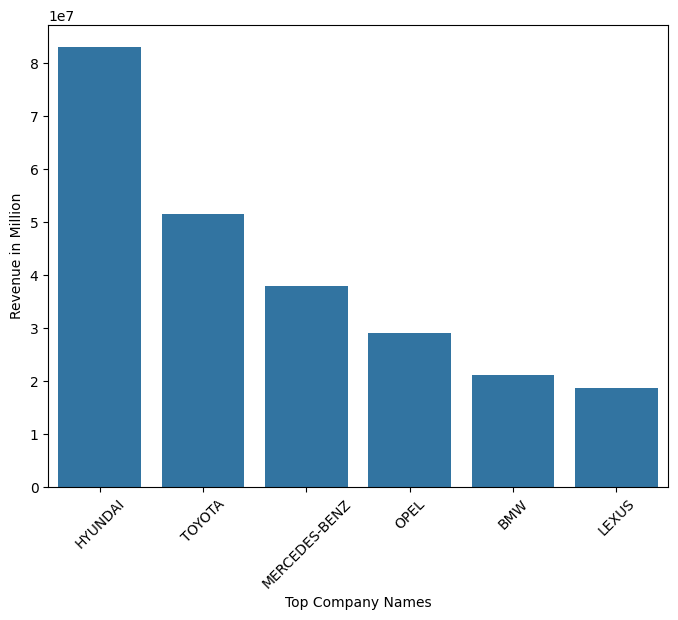

In [49]:
top_comp = df.groupby(['Manufacturer'])['Price'].sum().sort_values(ascending=False)[:6].reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x = 'Manufacturer',y='Price',data=top_comp)
plt.xlabel('Top Company Names')
plt.ylabel('Revenue in Million')
plt.xticks(rotation =45)
plt.show()

<Axes: xlabel='Mileage', ylabel='Price'>

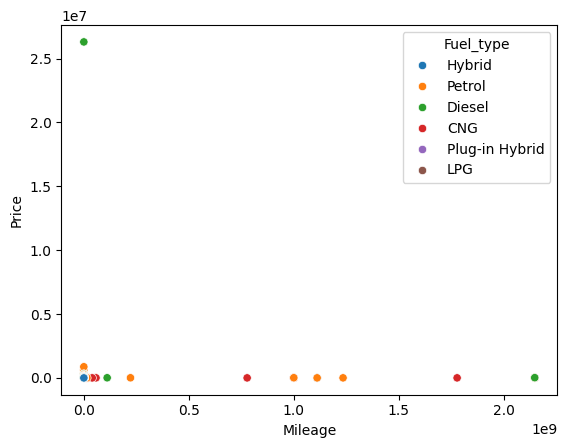

In [50]:
sns.scatterplot(x='Mileage',y ='Price',hue='Fuel_type',data=df)

In [51]:
### there's a outlier as we see 

df[df['Price']>2000000] # Doesn't make sense remove it !!

,ID,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Engine_is_turbo,Mileage,Cylinders,Gear_type,Drive_wheels,Doors,Wheel,Color,Airbags,Extra_tax,Price
16983,45812886,OPEL,Combo,1999,Goods wagon,False,Diesel,1.7,False,99999,4,Manual,Front,2 - 3,Left wheel,Blue,0,0.0,26307500


In [ ]:
##